<a href="https://colab.research.google.com/github/presleyyyy/Presley-data-science/blob/main/API_to_Pandas_Dataframe_checkpoint_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

What You're Aiming For

In this checkpoint, we are going to practice consuming public APIs through the NASA public APIs portal.

Portal description : The objective of this portal is to make NASA data, including imagery, eminently accessible to application developers and data professionals. Before starting to use its APIs endpoints, it's mandatory that you generate your API KEY and store it somewhere for later use. The API key acts as the user identifier when requesting the API. To get your KEY, fill in the provided form with your personal information, and then we shall receive an email containing your personal API KEY.

➡️ NASA API PORTAL

https://i.imgur.com/hisTmpk.png




Instructions

1. Go to the NASA API portal and generate your API KEY
2. Import the requests package and store your API KEY in variable
3. Go back to portal website and click on 'browse APIs'
4. Click on the first dropdown menu, named 'APOD' and read its documentation
5. Follow the provided documentation to ask the API endpoint for the astronomy picture of the day. Get then display the image on your notebook.
6. Go through the list of the provided API endpoints once again and select 'Astronomy Picture of the Day' option. Store the results in a pandas dataframe
7. Do the necessary data pre-processing tasks on the previous result in order to get a clean dataframe with the following columns :
Asteroid ID
Asteroid name
The Minimal estimated diameter in Kilometre
Absolute_magnitude
Relative_velocity(km/s)
8. Try to export the new dataframe into a CSV file and share it with your colleagues

In [ ]:
!pip install requests


In [ ]:
import requests
import json
import webbrowser

In [ ]:
#API key
API_KEY='xkcZFg7LfKMVNXKaGqgtYOl0aOeiGfUadWkjhPgo'

In [ ]:
url = 'https://api.nasa.gov/planetary/apod'

In [ ]:
params={
    'date':'2024-03-11',
    'hd':'True',
    'api_key':API_KEY
}

In [ ]:
response = requests.get(url,params=params)
json_data = json.loads(response.text)
image_url = json_data['hdurl']
image_url

'https://apod.nasa.gov/apod/image/2403/FullPlantonMoon_Horalek_1022.jpg'

In [ ]:
!wget $image_url

--2024-03-11 12:58:03--  https://apod.nasa.gov/apod/image/2403/FullPlantonMoon_Horalek_1022.jpg
Resolving apod.nasa.gov (apod.nasa.gov)... 129.164.179.22, 2001:4d0:2310:150::22
Connecting to apod.nasa.gov (apod.nasa.gov)|129.164.179.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 165692 (162K) [image/jpeg]
Saving to: ‘FullPlantonMoon_Horalek_1022.jpg’

FullPlantonMoon_Hor 100%[===================>] 161.81K  --.-KB/s    in 0.04s   

2024-03-11 12:58:03 (3.98 MB/s) - ‘FullPlantonMoon_Horalek_1022.jpg’ saved [165692/165692]



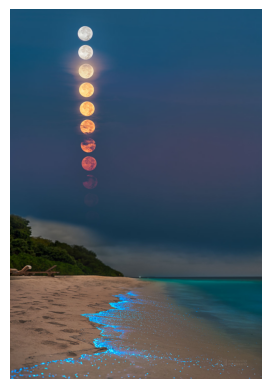

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('/content/FullPlantonMoon_Horalek_1022.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
import pandas as pd

In [ ]:
url2= "https://api.nasa.gov/neo/rest/v1/feed"

In [ ]:
params2= {
    'api_key':API_KEY,
    'start_date': '2024-03-11'
}

In [ ]:
response2 = requests.get(url2,params2)

In [ ]:
json_data2 = json.loads(response2.text)
json_data2

{'links': {'next': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2024-03-18&end_date=2024-03-25&detailed=false&api_key=xkcZFg7LfKMVNXKaGqgtYOl0aOeiGfUadWkjhPgo',
  'previous': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2024-03-04&end_date=2024-03-11&detailed=false&api_key=xkcZFg7LfKMVNXKaGqgtYOl0aOeiGfUadWkjhPgo',
  'self': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2024-03-11&end_date=2024-03-18&detailed=false&api_key=xkcZFg7LfKMVNXKaGqgtYOl0aOeiGfUadWkjhPgo'},
 'element_count': 59,
 'near_earth_objects': {'2024-03-16': [{'links': {'self': 'http://api.nasa.gov/neo/rest/v1/neo/54102026?api_key=xkcZFg7LfKMVNXKaGqgtYOl0aOeiGfUadWkjhPgo'},
    'id': '54102026',
    'neo_reference_id': '54102026',
    'name': '(2020 YW3)',
    'nasa_jpl_url': 'https://ssd.jpl.nasa.gov/tools/sbdb_lookup.html#/?sstr=54102026',
    'absolute_magnitude_h': 25.73,
    'estimated_diameter': {'kilometers': {'estimated_diameter_min': 0.0189913123,
      'estimated_diameter_max': 0.0424658654},
     

In [ ]:
all_object_near_earth = json_data2['near_earth_objects']['2024-03-16']
all_object_near_earth

[{'links': {'self': 'http://api.nasa.gov/neo/rest/v1/neo/54102026?api_key=xkcZFg7LfKMVNXKaGqgtYOl0aOeiGfUadWkjhPgo'},
  'id': '54102026',
  'neo_reference_id': '54102026',
  'name': '(2020 YW3)',
  'nasa_jpl_url': 'https://ssd.jpl.nasa.gov/tools/sbdb_lookup.html#/?sstr=54102026',
  'absolute_magnitude_h': 25.73,
  'estimated_diameter': {'kilometers': {'estimated_diameter_min': 0.0189913123,
    'estimated_diameter_max': 0.0424658654},
   'meters': {'estimated_diameter_min': 18.9913123471,
    'estimated_diameter_max': 42.46586539},
   'miles': {'estimated_diameter_min': 0.0118006507,
    'estimated_diameter_max': 0.0263870572},
   'feet': {'estimated_diameter_min': 62.3074572008,
    'estimated_diameter_max': 139.3237098062}},
  'is_potentially_hazardous_asteroid': False,
  'close_approach_data': [{'close_approach_date': '2024-03-16',
    'close_approach_date_full': '2024-Mar-16 16:25',
    'epoch_date_close_approach': 1710606300000,
    'relative_velocity': {'kilometers_per_second': '

In [ ]:
df = pd.DataFrame([near_earth_objects['id'], near_earth_objects['name'], near_earth_objects['estimated_diameter']['kilometers']['estimated_diameter_min'], near_earth_objects['absolute_magnitude_h'], near_earth_objects['close_approach_data'][0]['relative_velocity']['kilometers_per_second']] for near_earth_objects in all_object_near_earth )
df.columns = columns=('Asteroid ID', 'Asteroid name','Minimal estimated diameter in Kilometre', 'Absolute_magnitude', 'Relative velocity(km/s)')
df

,Asteroid ID,Asteroid name,Minimal estimated diameter in Kilometre,Absolute_magnitude,Relative velocity(km/s)
0,54102026,(2020 YW3),0.018991,25.730,9.3983612533
1,54248967,(2022 EK1),0.030942,24.670,11.0108039511
2,54427182,(2024 CJ8),0.060891,23.200,12.0625885021
3,54429352,(2024 EK),0.013078,26.540,7.6173119283
4,54429481,(2024 EQ),0.017765,25.875,10.7074326761
